In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.family']='Times New Roman'

# 第2章 绘图工具
第二章主要讲述python主流绘图工具库的使用，包括matplotlib、seraborn、proplot、SciencePlots。

## 2.1 Matplotlib
Matplotlib是Python最基本的绘图库，也是主流的绘图库，详细信息见[Matplotlib 官方文档](https://matplotlib.org/stable/tutorials/index) <br>。
以下是Matplotlib库常见的图类型：
|函数|图类型|
|:---|:---|
|plot()|折线图、点图等|
|scatter()|散点图|
|bar()/barh()|柱形图、条形图|
|axhline/axvline|垂直于X/Y轴的直线|
|axhspan()/axvspan()|垂直于X/Y轴的矩形块|
|text()|添加文本|
|fill_between()|面积图、填充图|
|pie()|饼图|
|bosplot()|箱线图|
|errorbar()|误差线|

### 2.1.1 设置轴比例
设置轴比例是为了控制图表在 x 轴和 y 轴上的刻度间距，以及数据在图表中的显示比例。有时候，数据的分布范围很大，可能会导致图表显示不够直观，设置轴比例可以使图表更易于理解。例如，当数据在一个轴上的范围远大于另一个轴时，设置轴比例可以减少数据在某个轴上的压缩或拉伸，使得数据的分布更清晰可见。
设置轴比例可以用`ax.set_yscale()`函数，可选的方式有`linear`、`log`、`symlog`、`logit`以及自定义函数`function_base`。
接下来展示前4种方式的例子。

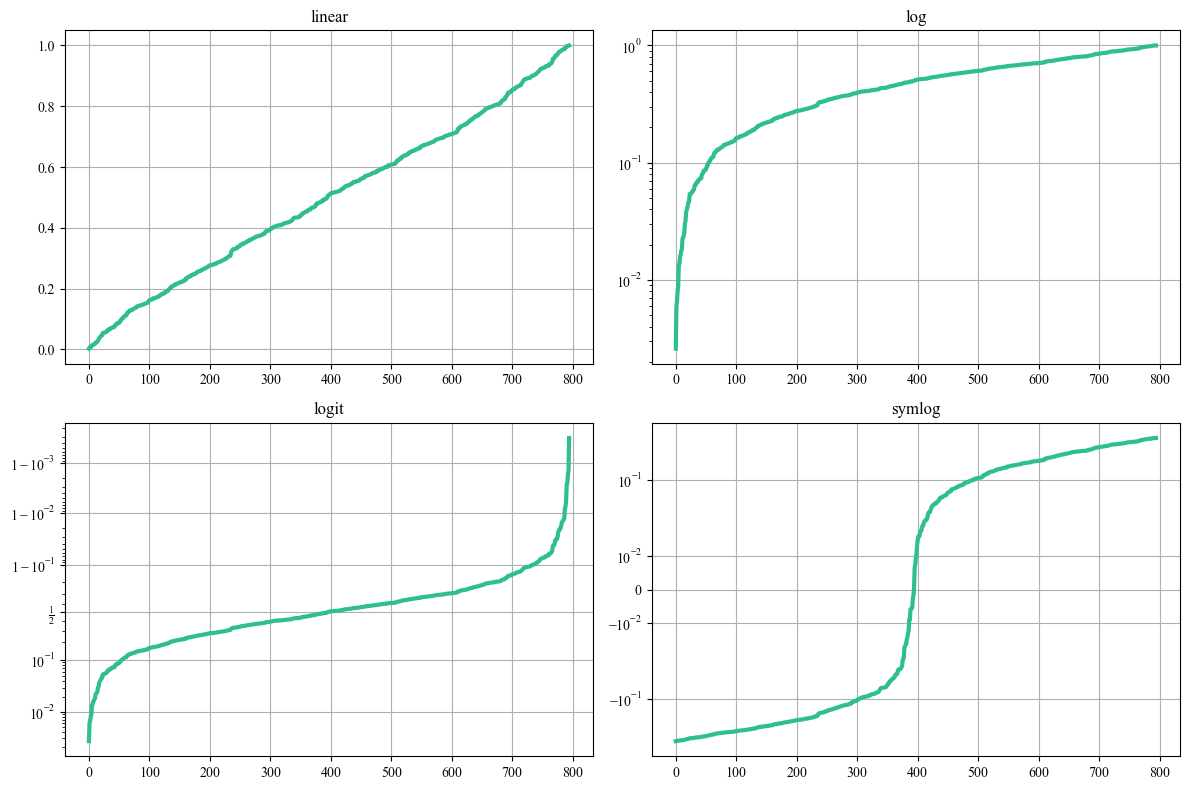

In [23]:
np.random.seed(2023)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=100,facecolor="w")
# linear
ax = axs[0, 0]
ax.plot(x, y,color="#2FBE8F",lw=3)
ax.set_yscale('linear')
ax.set_title('linear')
ax.grid(True)
# log
ax = axs[0, 1]
ax.plot(x, y,color="#2FBE8F",lw=3)
ax.set_yscale('log')
ax.set_title('log')
ax.grid(True)
# symmetric log
ax = axs[1, 1]
ax.plot(x, y - y.mean(),color="#2FBE8F",lw=3)
ax.set_yscale('symlog', linthresh=0.02)
ax.set_title('symlog')
ax.grid(True)
# logit
ax = axs[1, 0]
ax.plot(x, y,color="#2FBE8F",lw=3)
ax.set_yscale('logit')
ax.set_title('logit')
ax.grid(True)

plt.tight_layout()
plt.savefig('./images/demo_yscale.png',dpi=300) # 注意savefig要在show()前面，否则show的图片可能会一片空白
plt.show()

### 2.1.2 多图绘制
matplotlib提供了多种多图绘制的方法，包括subplot、subplots、gridspec等。这里介绍常用的3种：
1. subplot()


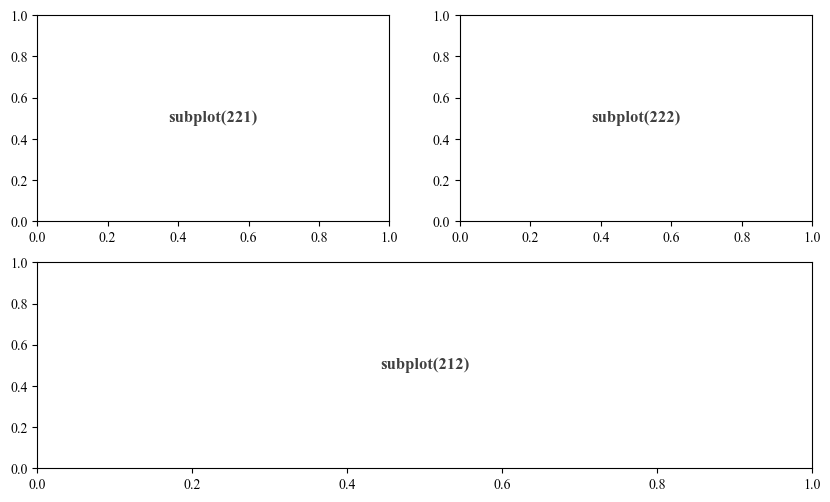

In [24]:
plt.figure(figsize=(10,6),dpi=100,facecolor="w")
ax1 = plt.subplot(212)
ax1.text(0.5, 0.5, "subplot(212)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
ax2 = plt.subplot(221)
ax2.text(0.5, 0.5, "subplot(221)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
ax3 = plt.subplot(222)
ax3.text(0.5, 0.5, "subplot(222)", alpha=0.75, ha="center", va="center", weight="bold", size=12)

plt.savefig('./images/demo_subplot.png',dpi=300) # 注意savefig要在show()前面，否则show的图片可能会一片空白
plt.show()

2. subplots()

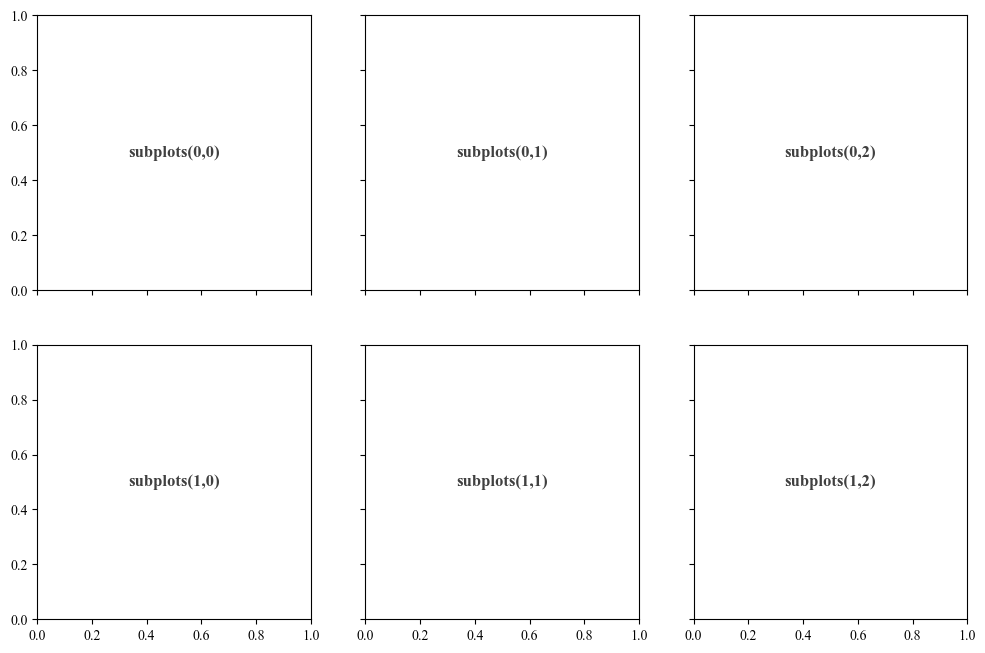

In [25]:
fig, axs = plt.subplots(2, 3,figsize=(12,8),dpi=100,sharex=True, sharey=True,facecolor="w")
axs[0,0].text(0.5, 0.5, "subplots(0,0)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
axs[0,1].text(0.5, 0.5, "subplots(0,1)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
axs[0,2].text(0.5, 0.5, "subplots(0,2)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
axs[1,0].text(0.5, 0.5, "subplots(1,0)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
axs[1,1].text(0.5, 0.5, "subplots(1,1)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
axs[1,2].text(0.5, 0.5, "subplots(1,2)", alpha=0.75, ha="center", va="center", weight="bold", size=12)

plt.savefig('./images/demo_subplots.png',dpi=300)
plt.show()

3. subplot2grid()

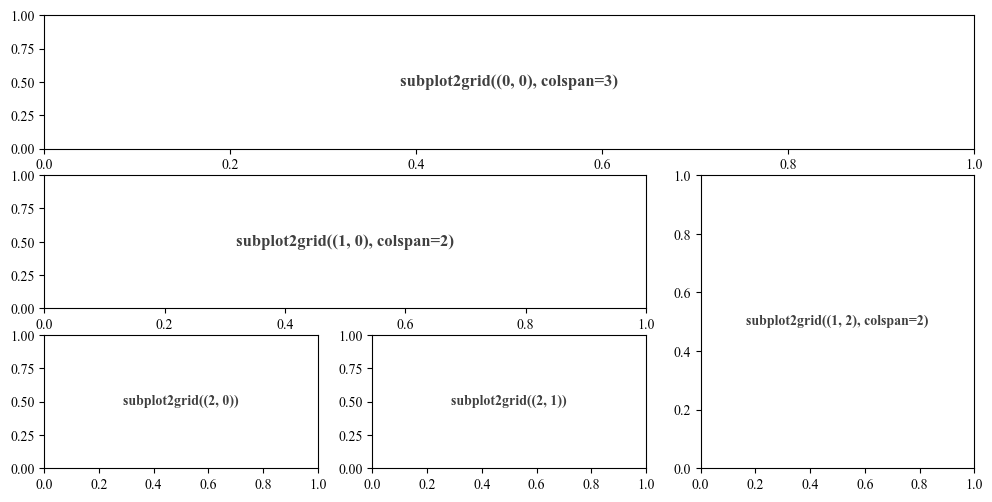

In [26]:
fig = plt.figure(figsize=(12,6),dpi=100,facecolor="w")
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1.text(0.5, 0.5, "subplot2grid((0, 0), colspan=3)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax2.text(0.5, 0.5, "subplot2grid((1, 0), colspan=2)", alpha=0.75, ha="center", va="center", weight="bold",size=12)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax3.text(0.5, 0.5, "subplot2grid((1, 2), colspan=2)", alpha=0.75, ha="center", va="center", weight="bold",size=10)   
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax4.text(0.5, 0.5, "subplot2grid((2, 0))", alpha=0.75, ha="center", va="center", weight="bold",size=10)
ax5 = plt.subplot2grid((3, 3), (2, 1))
ax5.text(0.5, 0.5, "subplot2grid((2, 1))", alpha=0.75, ha="center", va="center", weight="bold",size=10)

plt.savefig('./images/demo_subplot2grid.png',dpi=300)
plt.show()

## 2.2 Seaborn

Seaborn基于matplotlib封装了许多高级绘图函数，且能直接使用pandas的dataframe类型数据作为数据源，非常方便。（重点是更好看，优雅！）

Seaborn可以通过以下函数去改变绘图风格、颜色主题及元素缩放比例等：
- 绘图风格：`sns.set_style()` 或 `sns.set_theme()`。其中的`style`参数可选：whitegrid, darkgrid, dark, white, ticks。
- 颜色主题：`sns.set_palette()`，可选参数非常多，如`Set2`、`pastel`、`ch:s=.25,rot=-.25`、`light:<color>`等，具体请参考[Seaborn官方文档：color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)。
- 元素缩放比例：`sns.set_context()`，可选参数有：paper、notebook（默认）、talk 和 poster，缩放比例逐渐增大。
- 字体：`sns.set()`，可以直接设置字体，如`sns.set(font='Times New Roman', font_scale=1.5)`，也可以用`rc`字典参数来设置字体，如`font_dict = {'family': 'serif', 'weight': 'normal', 'size': 14}`，`sns.set(font_scale=1.5, rc=font_dict)`

In [87]:
# 设置seaborn风格
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                 "font.family"   : "Times New Roman", "font.scale": 1.5}

sns.set_style(style="ticks", rc=custom_params) #设置绘图风格

# sns.set_theme(style="ticks", rc=custom_params)
# sns.set_palette("palette_name") #设置颜色主题
# sns.set_context("context_name") #设置绘图元素缩放比例
# sns.set(font='Times New Roman', font_scale=1.5)

以下简单展示几个常见的Seaborn绘图函数。

### 2.2.1 lmplot
lmplot()函数用于绘制回归图，可以绘制散点图和回归直线。

<Figure size 1000x600 with 0 Axes>

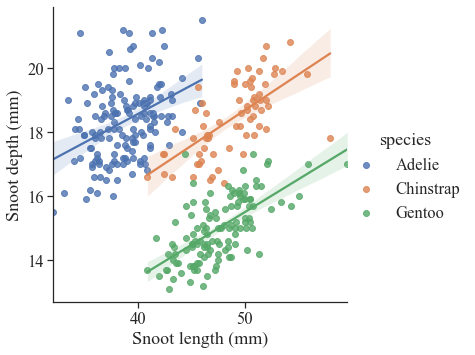

In [88]:

plt.figure(figsize=(10,6),dpi=100,facecolor="w")

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

plt.savefig('./images/Seaborn_lmplot.png', dpi=300, bbox_inches='tight')
plt.show()

### 2.2.2 histplot
直方图函数。这个直方图函数的可好玩了，可以绘制直方图，也可以绘制密度图，还可以绘制分布图。
以下为最基础的直方图：

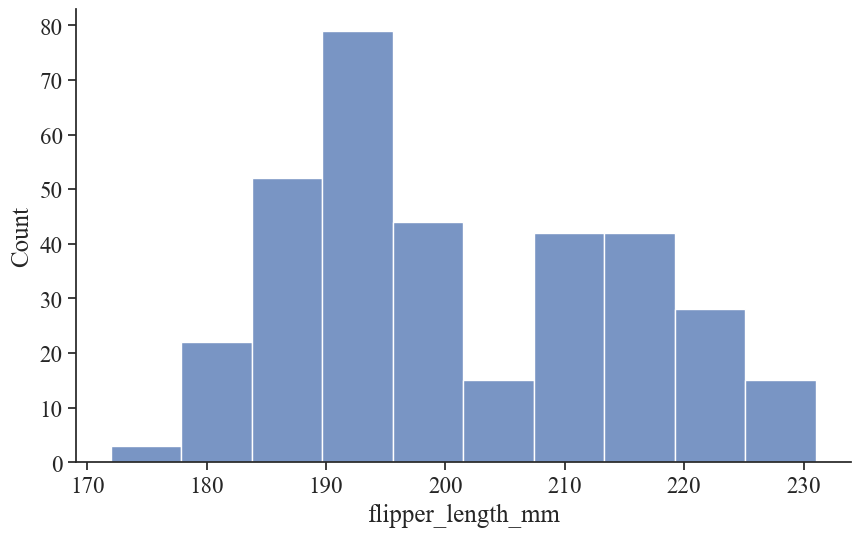

In [89]:
plt.figure(figsize=(10,6),dpi=100,facecolor="w")
sns.histplot(data=penguins, x="flipper_length_mm")

plt.savefig('./images/Seaborn_histplot_original.png', dpi=300, bbox_inches='tight')
plt.show()

加点魔法（kde = True），可以得到核密度估计曲线：

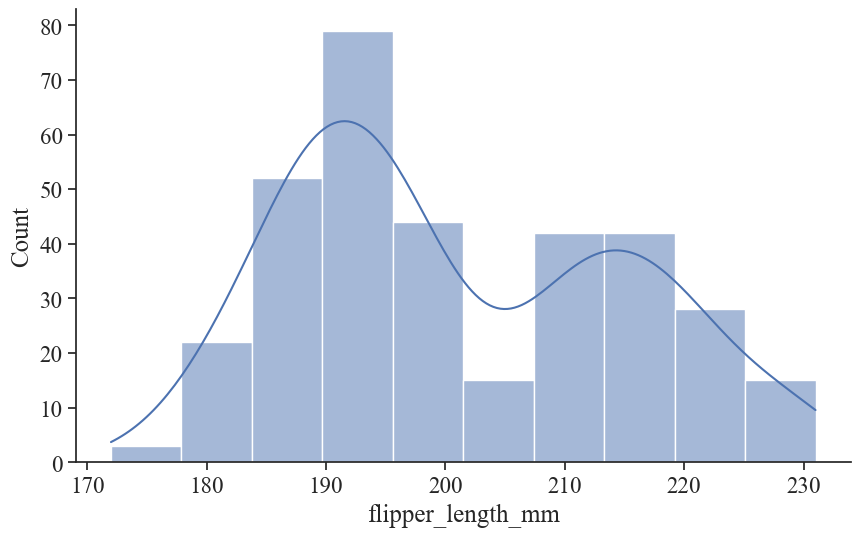

In [90]:
plt.figure(figsize=(10,6),dpi=100,facecolor="w")
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

plt.savefig('./images/Seaborn_histplot_kde.png', dpi=300, bbox_inches='tight')
plt.show()

再加点魔法（参数`hue`），可以绘制分组直方图：

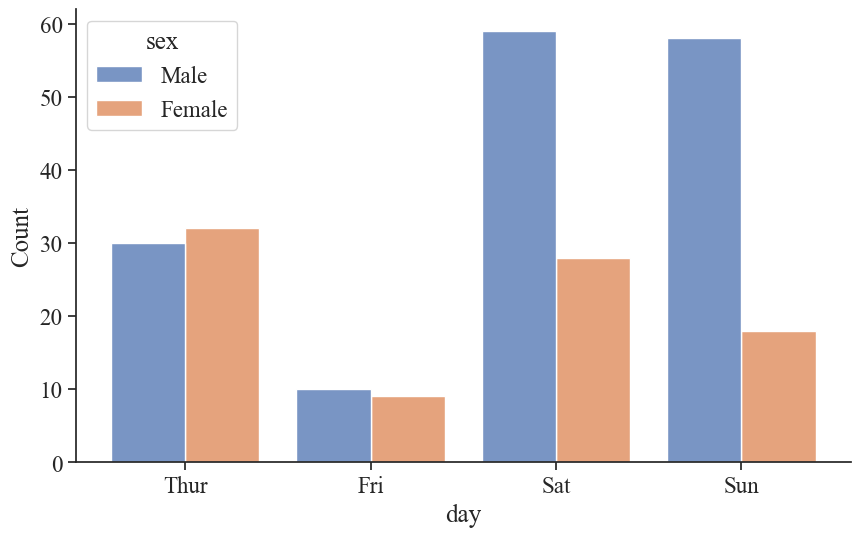

In [91]:
tips = sns.load_dataset("tips")

plt.figure(figsize=(10,6),dpi=100,facecolor="w")
sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)

plt.savefig('./images/Seaborn_histplot_hue.png', dpi=300, bbox_inches='tight')
plt.show()

甚至可以转换为热力图的形式来查看数据的分布（颜色越深表示该区域的样本数量越多）：

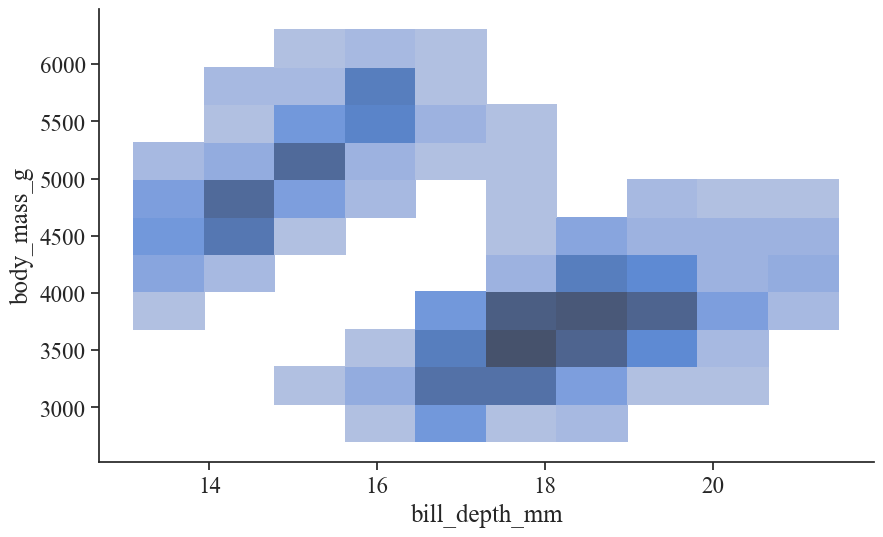

In [92]:
plt.figure(figsize=(10,6),dpi=100,facecolor="w")
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g")

plt.savefig('./images/Seaborn_histplot_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

更多玩法可以参阅[Seaborn: histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html?highlight=histplot#seaborn.histplot)。

### 2.2.3 violinplot
小提琴图可以直观地查看数据的分布特点。

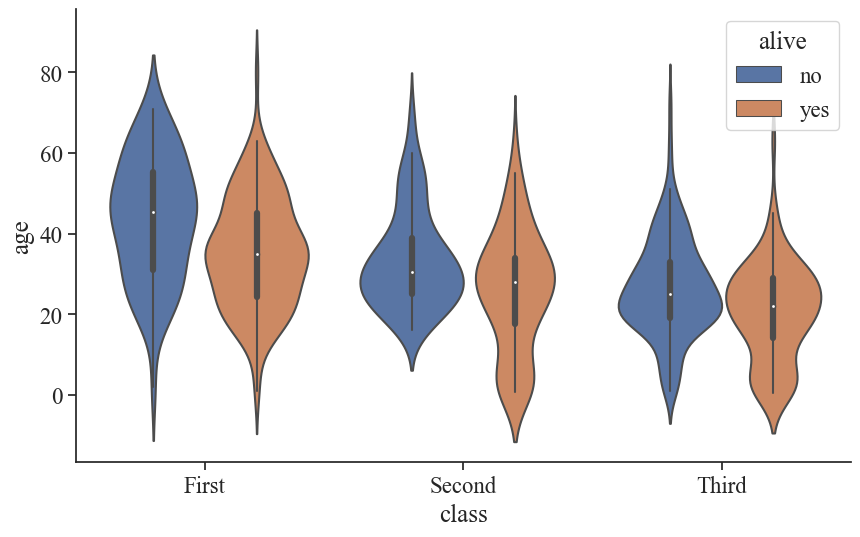

In [93]:
titanic = sns.load_dataset("titanic")

plt.figure(figsize=(10,6),dpi=100,facecolor="w")
sns.violinplot(data=titanic, x="class", y="age", hue="alive")

plt.savefig('./images/Seaborn_violinplot.png', dpi=300, bbox_inches='tight')
plt.show()

### 2.2.4 scatterplot
散点图。

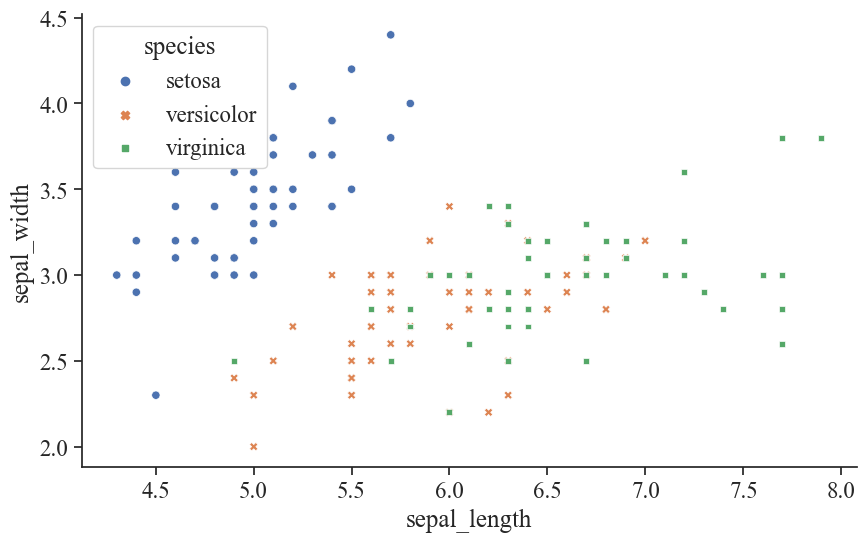

In [100]:
iris = sns.load_dataset("iris")

plt.figure(figsize=(10,6),dpi=100,facecolor="w")
# sns.scatterplot(data=titanic, x="age", y="fare", hue="alive")
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species", style='species')

plt.savefig('./images/Seaborn_scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

### 2.2.5 多图绘制
Seaborn多图绘制除了可以可以调用matplotlib的`subplots()`函数外，还可以调用`FactGrid()`、`pairplot()`和`PairGrid()`函数。

- pairplot <br>
`pairplot`函数主要用于查看数据的不同特征之间的分布关系，可以近似看成是相关系数的矩阵的图像化展示（但对角线上的图为该特征的分布图）。

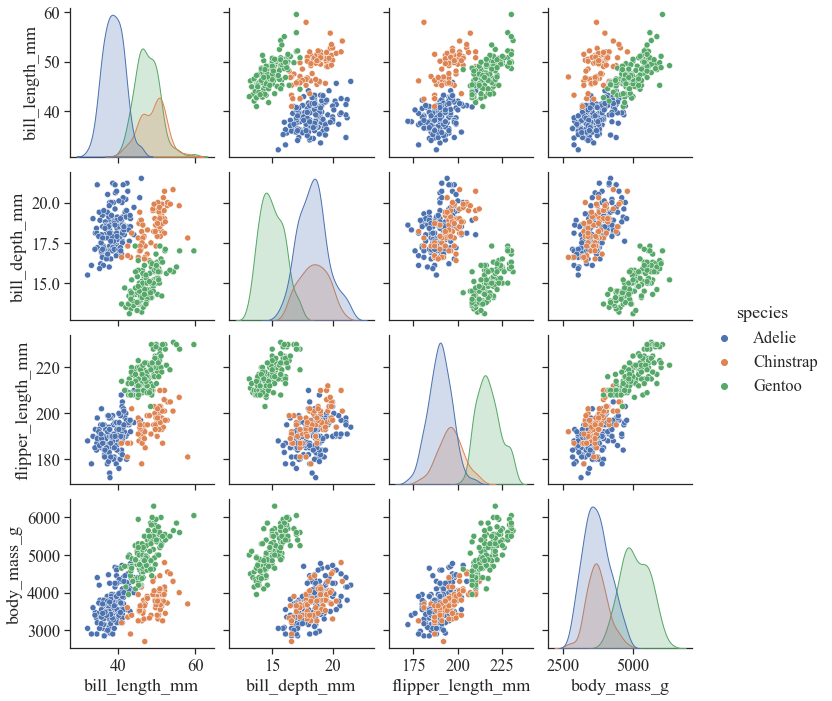

In [108]:
sns.pairplot(penguins, hue="species")
plt.savefig('./images/Seaborn_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

- FactGrid

f:\Anaconda\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
f:\Anaconda\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
f:\Anaconda\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
f:\Anaconda\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


<Figure size 1000x600 with 0 Axes>

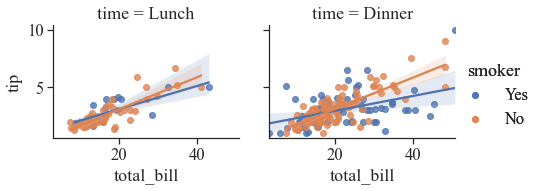

In [109]:
plt.figure(figsize=(10,6),dpi=100,facecolor="w")

graph = sns.FacetGrid(tips, col ='time', hue ='smoker') 
# map the above form facetgrid with some attributes 
graph.map(sns.regplot, "total_bill", "tip").add_legend() 
graph.add_legend() 

plt.savefig('./images/Seaborn_FactGrid.png', dpi=300, bbox_inches='tight')
plt.show()

- PairGrid

<Figure size 1000x600 with 0 Axes>

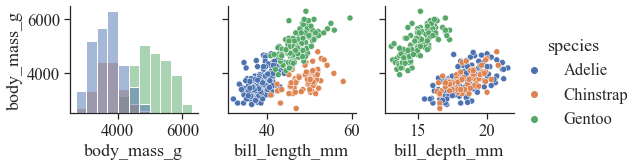

In [112]:
plt.figure(figsize=(10,6),dpi=100,facecolor="w")

x_vars = ["body_mass_g", "bill_length_mm", "bill_depth_mm",]
y_vars = ["body_mass_g"]
g = sns.PairGrid(penguins, hue="species", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

plt.savefig('./images/Seaborn_PairGrid.png', dpi=300, bbox_inches='tight')
plt.show()

## 2.3 Proplot
Proplot是一个基于matplotlib的绘图工具，它提供了一种更简单、更一致的绘图风格，并支持许多有用的绘图功能。

相比起matplotlib，Proplot最大的优点就是：简洁，优雅！

更简单的多图绘制（共享x、y轴）、更简单的颜色映射（colormap）和图例、支持pandas、自动分配空间等等。

安装方式：`pip install proplot`。

更多内容见[Proplot官方文档](https://proplot.readthedocs.io/en/latest/)。

### 2.3.1 多子图绘制
先用Proplot绘制一个简单的折线图：


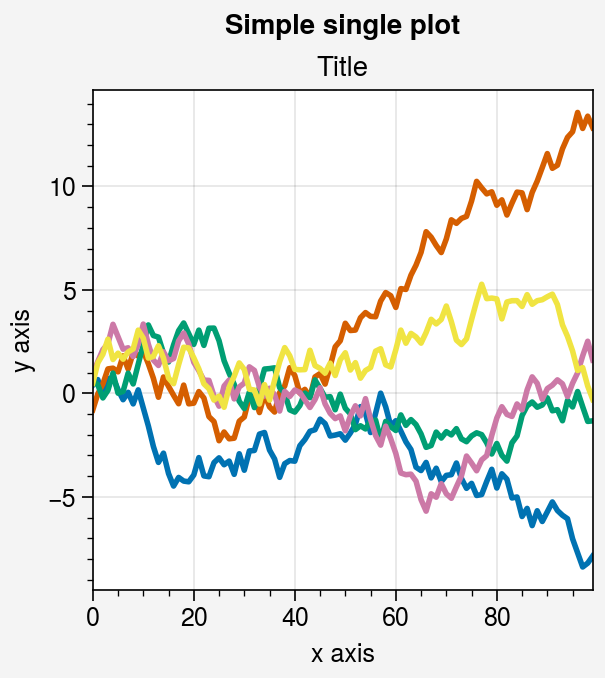

In [7]:
# Simple subplot
import numpy as np
import proplot as pplt

state = np.random.RandomState(51423)
data = 2 * (state.rand(100, 5) - 0.5).cumsum(axis=0)
fig = pplt.figure()
ax = fig.subplot(111)
ax.plot(data, lw=2)

fig.format(
    suptitle='Simple single plot', title='Title',
    xlabel='x axis', ylabel='y axis'
)

fig.save('./images/Proplot_example_single_plot.png')  # save the figure

Proplot提供了两种保存图片的方式：
- `fig.save('./images/Proplot_example1.png')  # save the figure`
- `fig.savefig('./images/Proplot_example1.png')  # alternative`

另外，Proplot已经默认将图片保存的dpi设置到了1000的超高分辨率，意味着每英寸的像素数是1000，已经符合绝大多数学术期刊的最低分辨率要求，不需要在设置dpi了。

双子图：

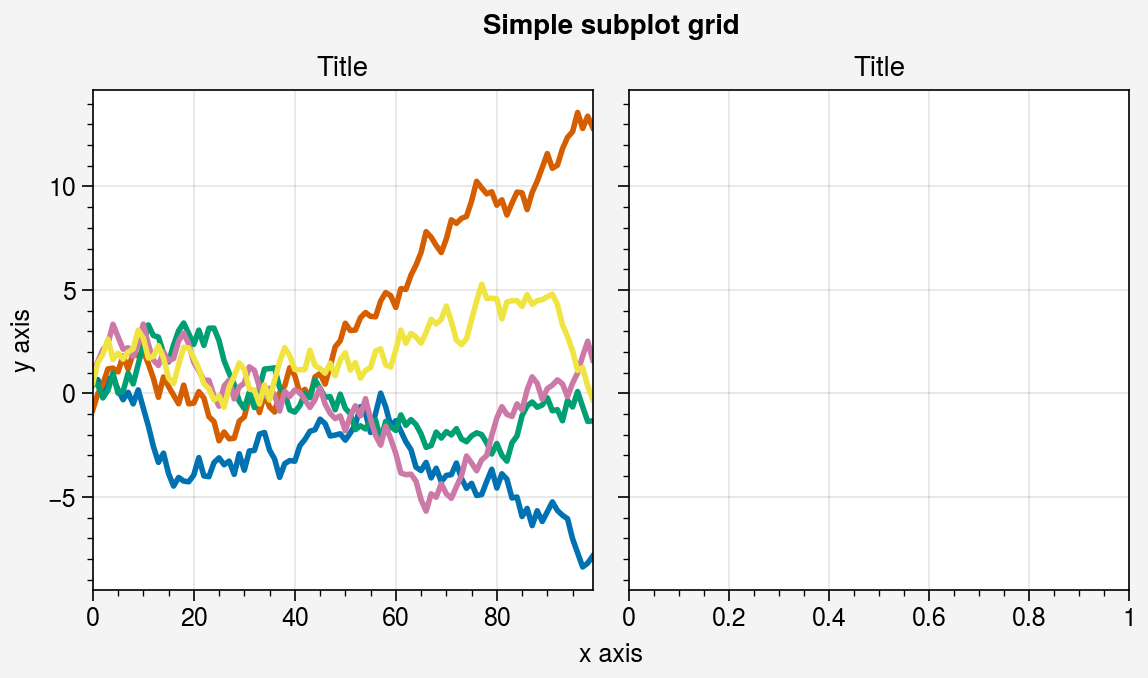

In [4]:
fig = pplt.figure()
ax = fig.subplot(121)
ax.plot(data, lw=2)

ax = fig.subplot(122)

fig.format(
    suptitle='Simple subplot grid', title='Title',
    xlabel='x axis', ylabel='y axis'
)

fig.save('./images/Proplot_example1.png')  # save the figure
# fig.savefig('~/example1.png')  # alternative

Proplot默认开启多个子图共享x、y轴的标签，大部分时候都是合适的，如果需要关闭共享xy轴，可以这么设置：
`pplt.rc.update('subplots', share=False, span=False)`

在绘制多个不规则子图时，Proplot提供了一种很新奇的方式：用一个数组来表示图片的分布布局，比如：

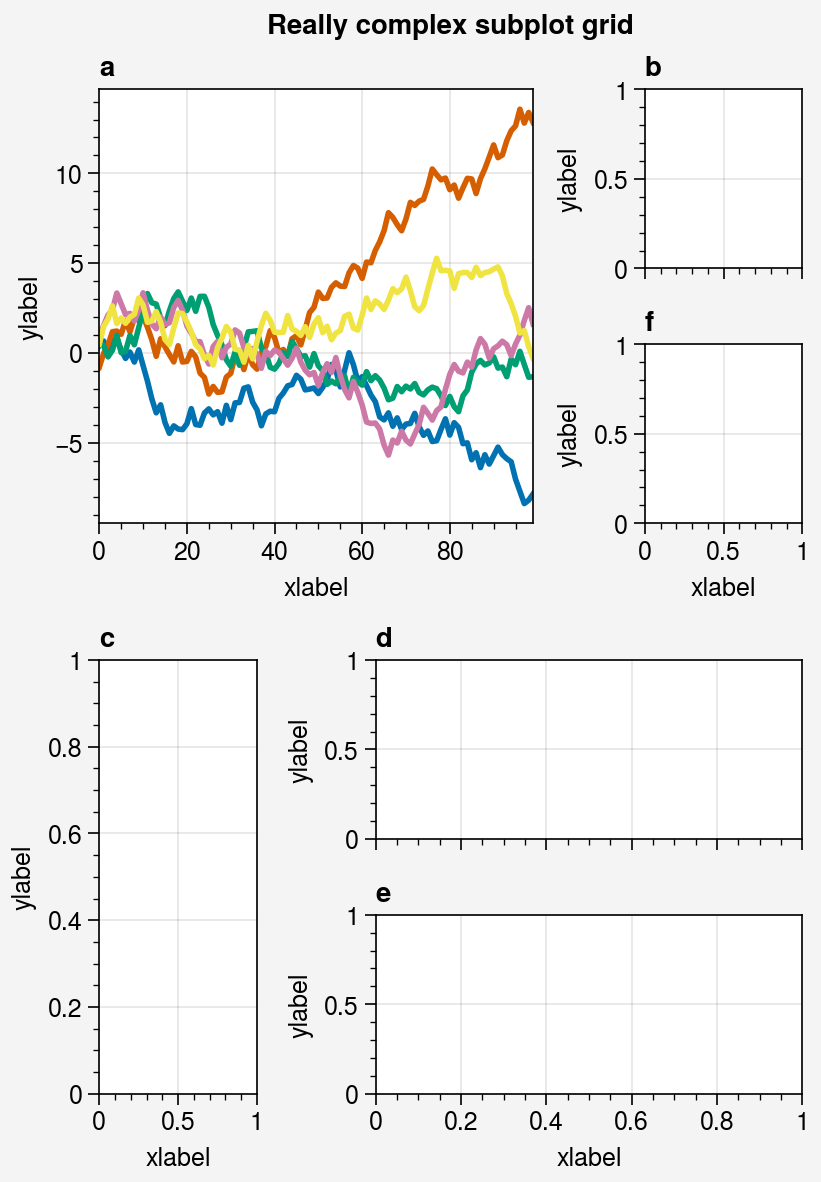

In [8]:
# Really complex grid
array = [  # the "picture" (1 == subplot A, 2 == subplot B, etc.)
    [1, 1, 2],
    [1, 1, 6],
    [3, 4, 4],
    [3, 5, 5],
]
fig, axs = pplt.subplots(array, figwidth=5, span=False)
axs.format(
    suptitle='Really complex subplot grid',
    xlabel='xlabel', ylabel='ylabel', abc=True
)
axs[0].plot(data, lw=2)
fig.save('./images/Proplot_example2.png')  # save the figure

当然，也可以采用类似matplotlib的`subplots`方式绘制多个子图：

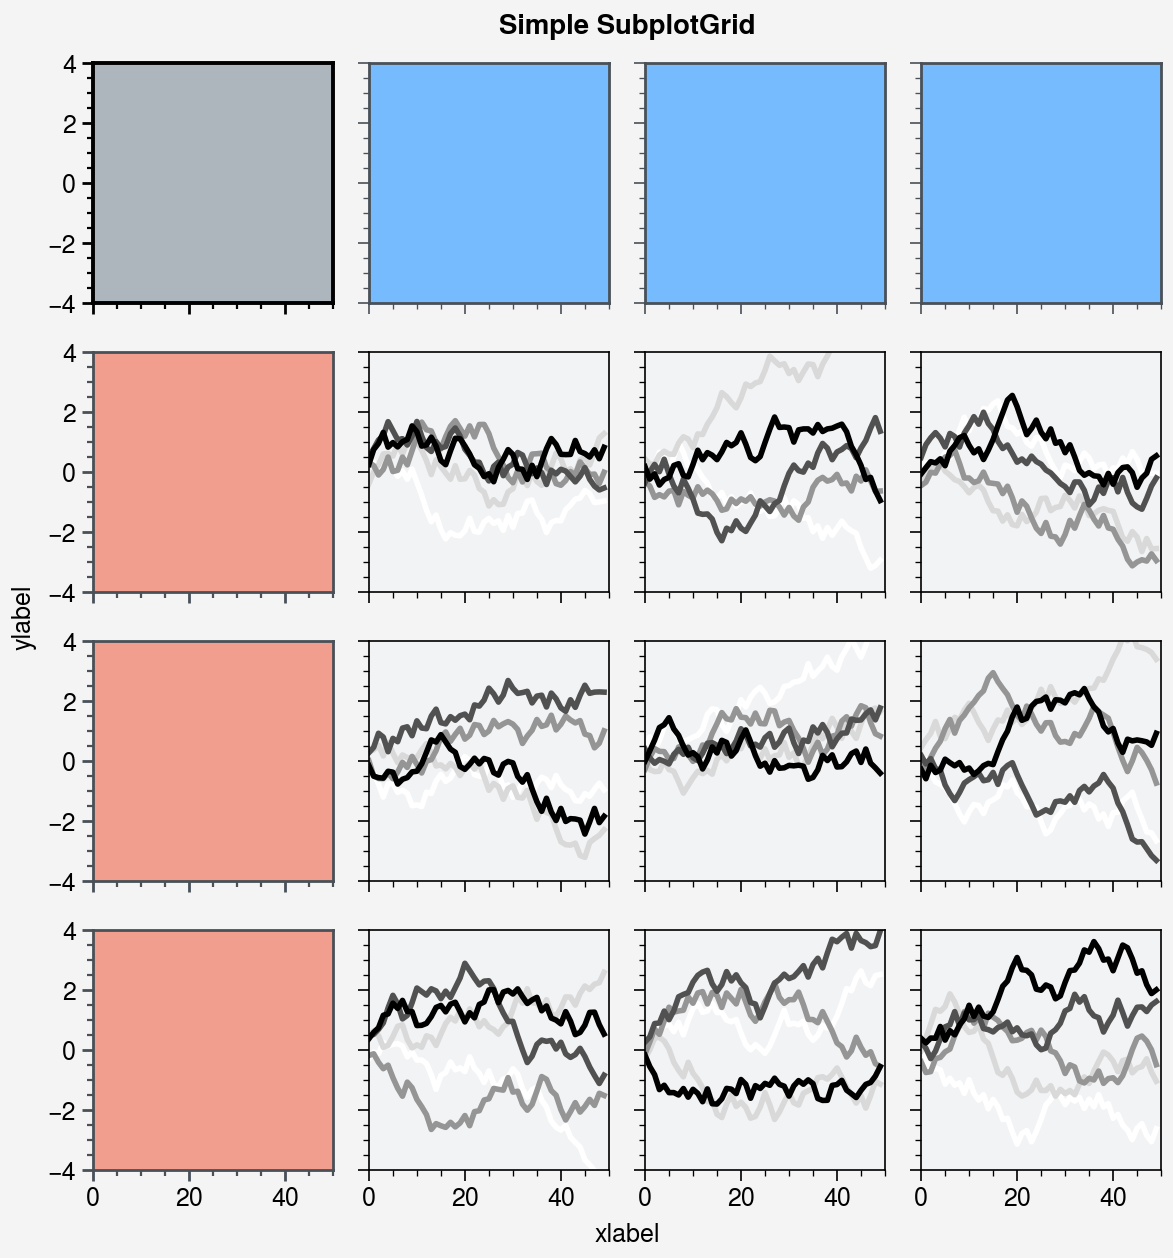

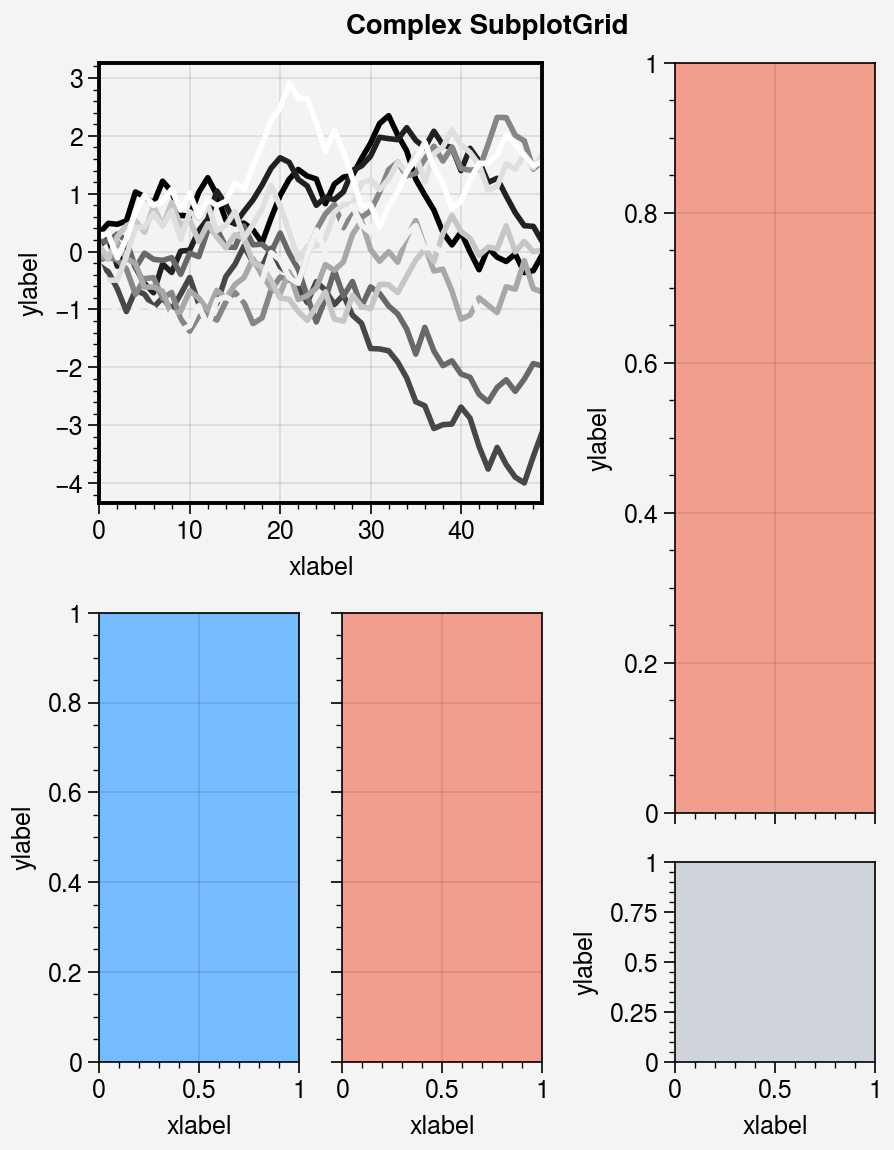

In [9]:
# Selected subplots in a simple grid
fig, axs = pplt.subplots(ncols=4, nrows=4, refwidth=1.2, span=True)
axs.format(xlabel='xlabel', ylabel='ylabel', suptitle='Simple SubplotGrid')
axs.format(grid=False, xlim=(0, 50), ylim=(-4, 4))
axs[:, 0].format(facecolor='blush', edgecolor='gray7', linewidth=1)  # eauivalent
axs[:, 0].format(fc='blush', ec='gray7', lw=1)
axs[0, :].format(fc='sky blue', ec='gray7', lw=1)
axs[0].format(ec='black', fc='gray5', lw=1.4)
axs[1:, 1:].format(fc='gray1')
for ax in axs[1:, 1:]:
    ax.plot((state.rand(50, 5) - 0.5).cumsum(axis=0), cycle='Grays', lw=2)
fig.save('./images/Proplot_example3.png')  # save the figure


# Selected subplots in a complex grid
fig = pplt.figure(refwidth=1, refnum=5, span=False)
axs = fig.subplots([[1, 1, 2], [3, 4, 2], [3, 4, 5]], hratios=[2.2, 1, 1])
axs.format(xlabel='xlabel', ylabel='ylabel', suptitle='Complex SubplotGrid')
axs[0].format(ec='black', fc='gray1', lw=1.4)
axs[1, 1:].format(fc='blush')
axs[1, :1].format(fc='sky blue')
axs[-1, -1].format(fc='gray4', grid=False)
axs[0].plot((state.rand(50, 10) - 0.5).cumsum(axis=0), cycle='Grays_r', lw=2)
fig.save('./images/Proplot_example4.png')  # save the figure

### 2.3.2 颜色和图例
Proplot支持非常多的colormap，如下：

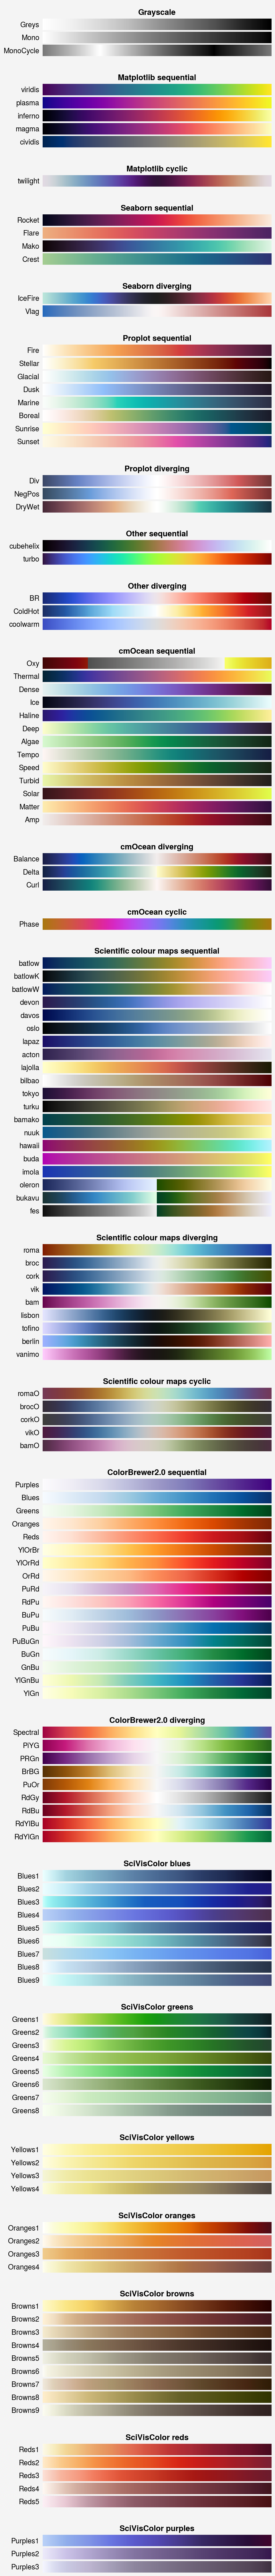

In [12]:
import proplot as pplt
fig, axs = pplt.show_cmaps()
fig.save('./images/Proplot_cmaps.png')

举个例子：

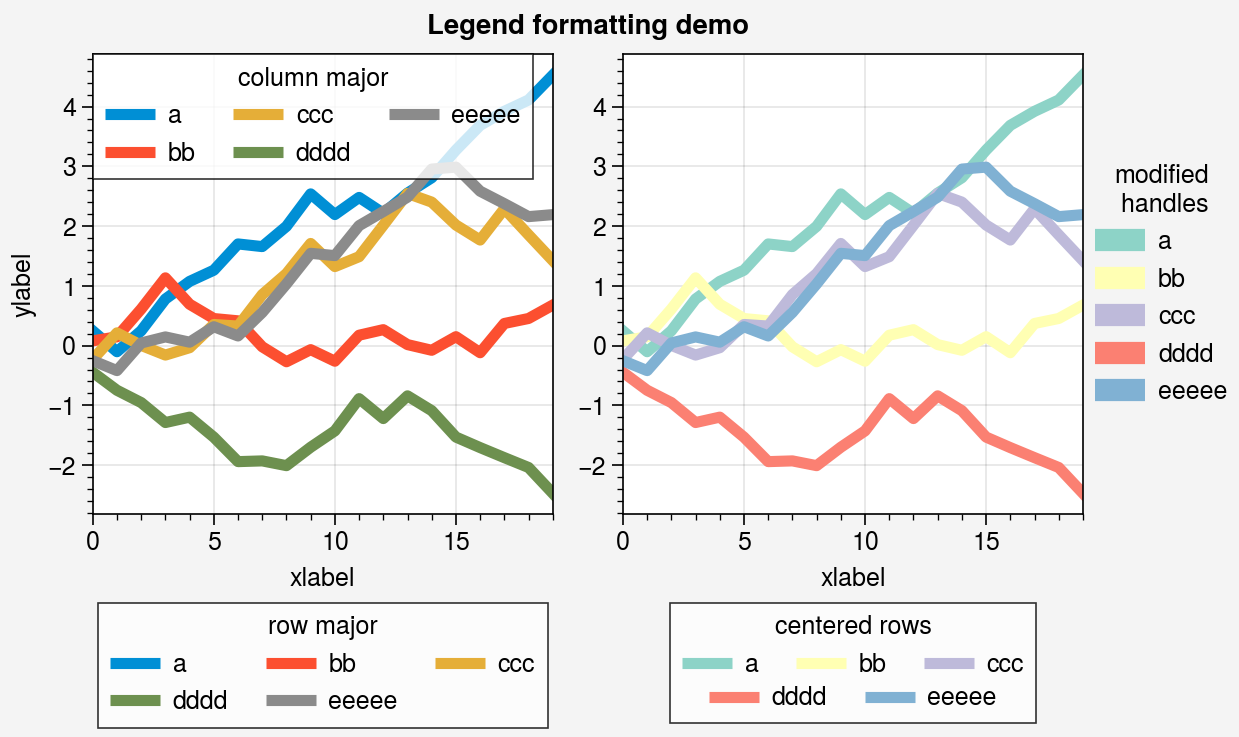

In [15]:
pplt.rc.cycle = '538'
fig, axs = pplt.subplots(ncols=2, span=False, share='labels', refwidth=2.3)
labels = ['a', 'bb', 'ccc', 'dddd', 'eeeee']
hs1, hs2 = [], []

# On-the-fly legends
state = np.random.RandomState(51423)
for i, label in enumerate(labels):
    data = (state.rand(20) - 0.45).cumsum(axis=0)
    h1 = axs[0].plot(
        data, lw=4, label=label, legend='ul',
        legend_kw={'order': 'F', 'title': 'column major'}
    )
    hs1.extend(h1)
    h2 = axs[1].plot(
        data, lw=4, cycle='Set3', label=label, legend='r',
        legend_kw={'lw': 8, 'ncols': 1, 'frame': False, 'title': 'modified\n handles'}
    )
    hs2.extend(h2)

# Outer legends
ax = axs[0]
ax.legend(hs1, loc='b', ncols=3, title='row major', order='C', facecolor='gray2')
ax = axs[1]
ax.legend(hs2, loc='b', ncols=3, center=True, title='centered rows')
axs.format(xlabel='xlabel', ylabel='ylabel', suptitle='Legend formatting demo')
fig.save('./images/Proplot_example5.png')

### 2.3.3 散点图和条形图
Proplot可以画出非常漂亮的散点图。

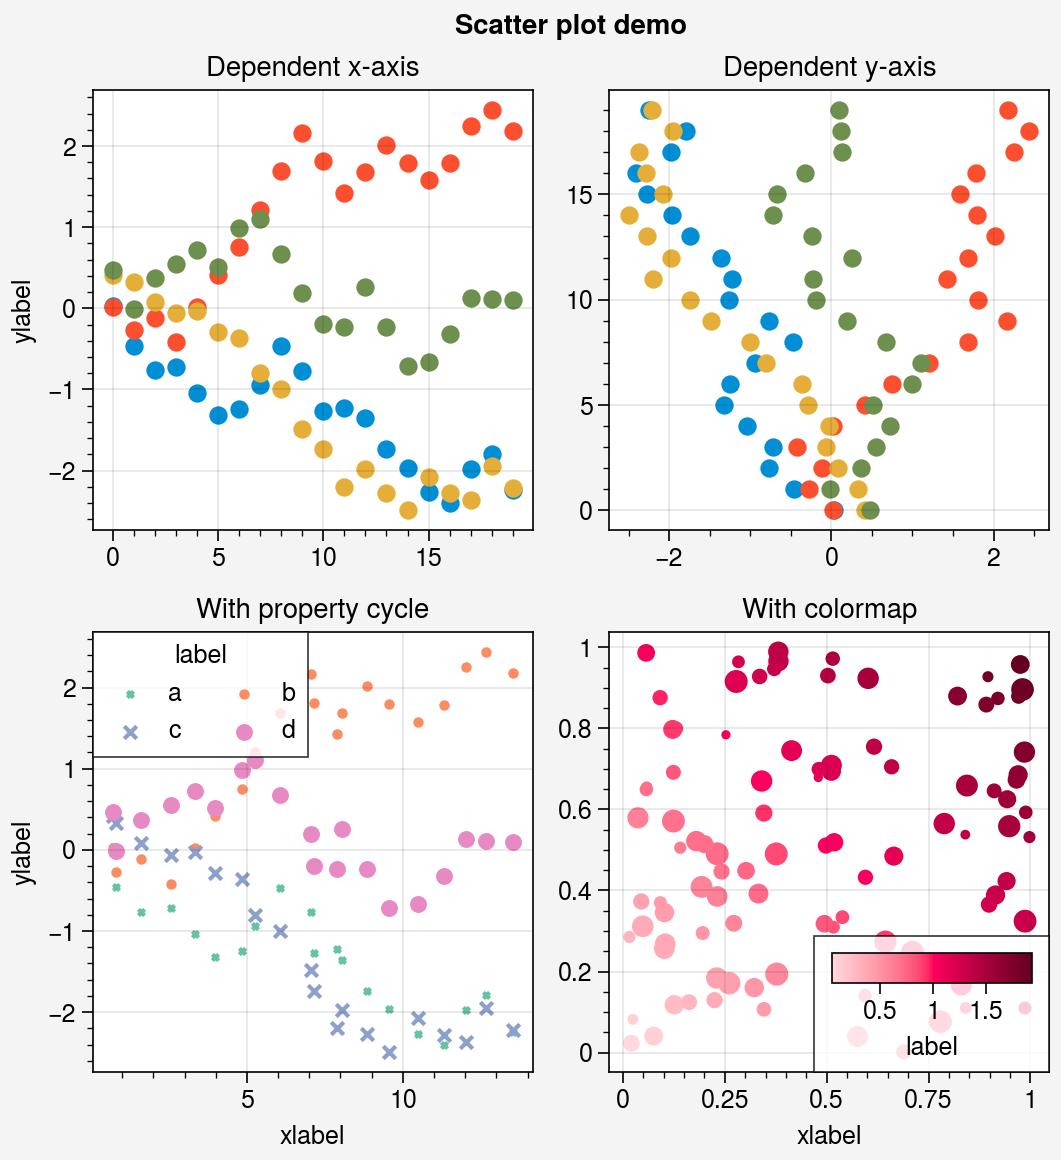

In [16]:
import pandas as pd

# Sample data
state = np.random.RandomState(51423)
x = (state.rand(20) - 0).cumsum()
data = (state.rand(20, 4) - 0.5).cumsum(axis=0)
data = pd.DataFrame(data, columns=pd.Index(['a', 'b', 'c', 'd'], name='label'))

# Figure
gs = pplt.GridSpec(ncols=2, nrows=2)
fig = pplt.figure(refwidth=2.2, share='labels', span=False)

# Vertical vs. horizontal
ax = fig.subplot(gs[0], title='Dependent x-axis')
ax.scatter(data, cycle='538')
ax = fig.subplot(gs[1], title='Dependent y-axis')
ax.scatterx(data, cycle='538')

# Scatter plot with property cycler
ax = fig.subplot(gs[2], title='With property cycle')
obj = ax.scatter(
    x, data, legend='ul', legend_kw={'ncols': 2},
    cycle='Set2', cycle_kw={'m': ['x', 'o', 'x', 'o'], 'ms': [5, 10, 20, 30]}
)

# Scatter plot with colormap
ax = fig.subplot(gs[3], title='With colormap')
data = state.rand(2, 100)
obj = ax.scatter(
    *data,
    s=state.rand(100), smin=6, smax=60, marker='o',
    c=data.sum(axis=0), cmap='maroon',
    colorbar='lr', colorbar_kw={'label': 'label'},
)
fig.format(suptitle='Scatter plot demo', xlabel='xlabel', ylabel='ylabel')
fig.save('./images/Proplot_scatter.png')

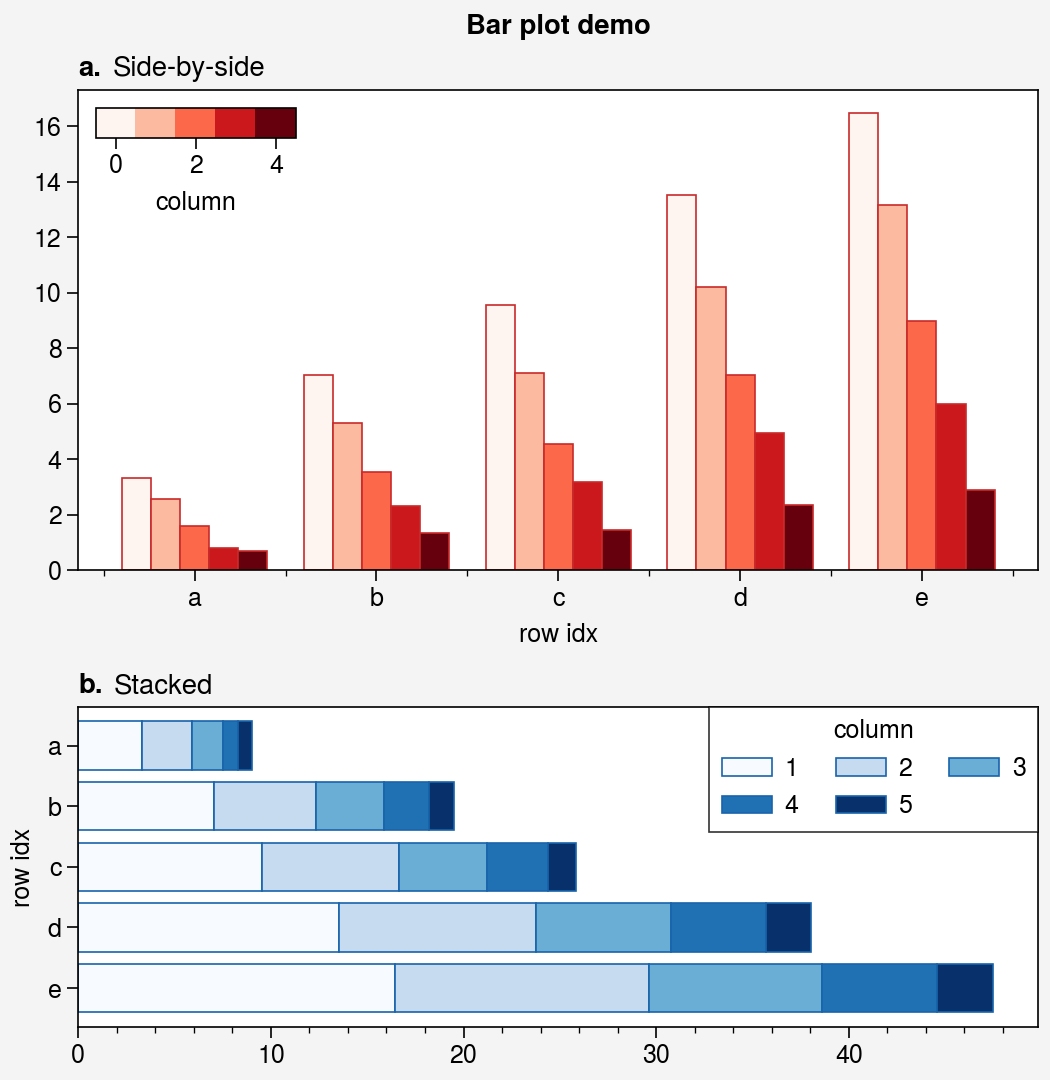

In [17]:
# Sample data
state = np.random.RandomState(51423)
data = state.rand(5, 5).cumsum(axis=0).cumsum(axis=1)[:, ::-1]
data = pd.DataFrame(
    data, columns=pd.Index(np.arange(1, 6), name='column'),
    index=pd.Index(['a', 'b', 'c', 'd', 'e'], name='row idx')
)

# Figure
pplt.rc.abc = 'a.'
pplt.rc.titleloc = 'l'
gs = pplt.GridSpec(nrows=2, hratios=(3, 2))
fig = pplt.figure(refaspect=2, refwidth=4.8, share=False)

# Side-by-side bars
ax = fig.subplot(gs[0], title='Side-by-side')
obj = ax.bar(
    data, cycle='Reds', edgecolor='red9', colorbar='ul', colorbar_kw={'frameon': False}
)
ax.format(xlocator=1, xminorlocator=0.5, ytickminor=False)

# Stacked bars
ax = fig.subplot(gs[1], title='Stacked')
obj = ax.barh(
    data.iloc[::-1, :], cycle='Blues', edgecolor='blue9', legend='ur', stack=True,
)
fig.format(grid=False, suptitle='Bar plot demo')
pplt.rc.reset()
fig.save('./images/Proplot_barplot.png')

## 2.4 SciencePlots
SciencePlots是一个专门为科研论文打造的轻量化的绘图工具包，但需要安装的东西可不少，以下是我的环境：
- Win10
- MikeTex，安装完成后将安装目录`C:\Users\Administrator\AppData\Local\Programs\MiKTeX\miktex\bin`添加到系统得到环境变量中；
- 安装SciencePlots：`pip install SciencePlots`

SciencePlots的使用非常简单，只需加一行命令即可，以下两种使用方式：
- `plt.style.use('science')`
- `with plt.style.context('science'): xxx`
这里推荐第一种方式。

首先我们来看没用SciencePlots的绘图，代码如下：

<Figure size 5400x3600 with 0 Axes>

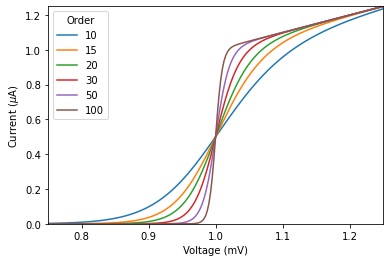

In [1]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.reload_library()

def model(x, p): 
   return x ** (2 * p + 1) / (1 + x ** (2 * p))
x = np.linspace(0.75, 1.25, 201)

# Matplotlib
plt.figure(figsize=(18, 12), dpi=300, facecolor='white')
fig, ax = plt.subplots()
for p in [10, 15, 20, 30, 50, 100]:      
    ax.plot(x, model(x, p), label=p)
ax.legend(title='Order')
ax.set(xlabel='Voltage (mV)')
ax.set(ylabel='Current ($\mu$A)')
ax.autoscale(tight=True)

plt.savefig('./images/SciencePlots_not_active.png', dpi=300, bbox_inches='tight',facecolor='white')
plt.show()

再来看用了SciencePlots的绘图，代码如下：

<Figure size 1000x600 with 0 Axes>

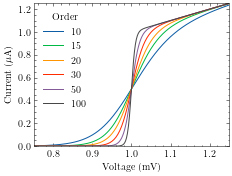

In [6]:
plt.style.use('science')

# with plt.style.context(['science']):
plt.figure(figsize=(10, 6), dpi=100)
fig, ax = plt.subplots()        
for p in [10, 15, 20, 30, 50, 100]:               
    ax.plot(x, model(x, p), label=p)        
ax.legend(title='Order')        
ax.set(xlabel='Voltage (mV)')        
ax.set(ylabel='Current ($\mu$A)')        
ax.autoscale(tight=True)     

plt.savefig('./images/SciencePlots_active.png', dpi=300, bbox_inches='tight',facecolor='white')
plt.show()

Amazing! 非常得优雅，符合科研的严谨风格，这谁看了不得地把你论文录了？

再来看看IEEE期刊的风格：

<Figure size 1000x600 with 0 Axes>

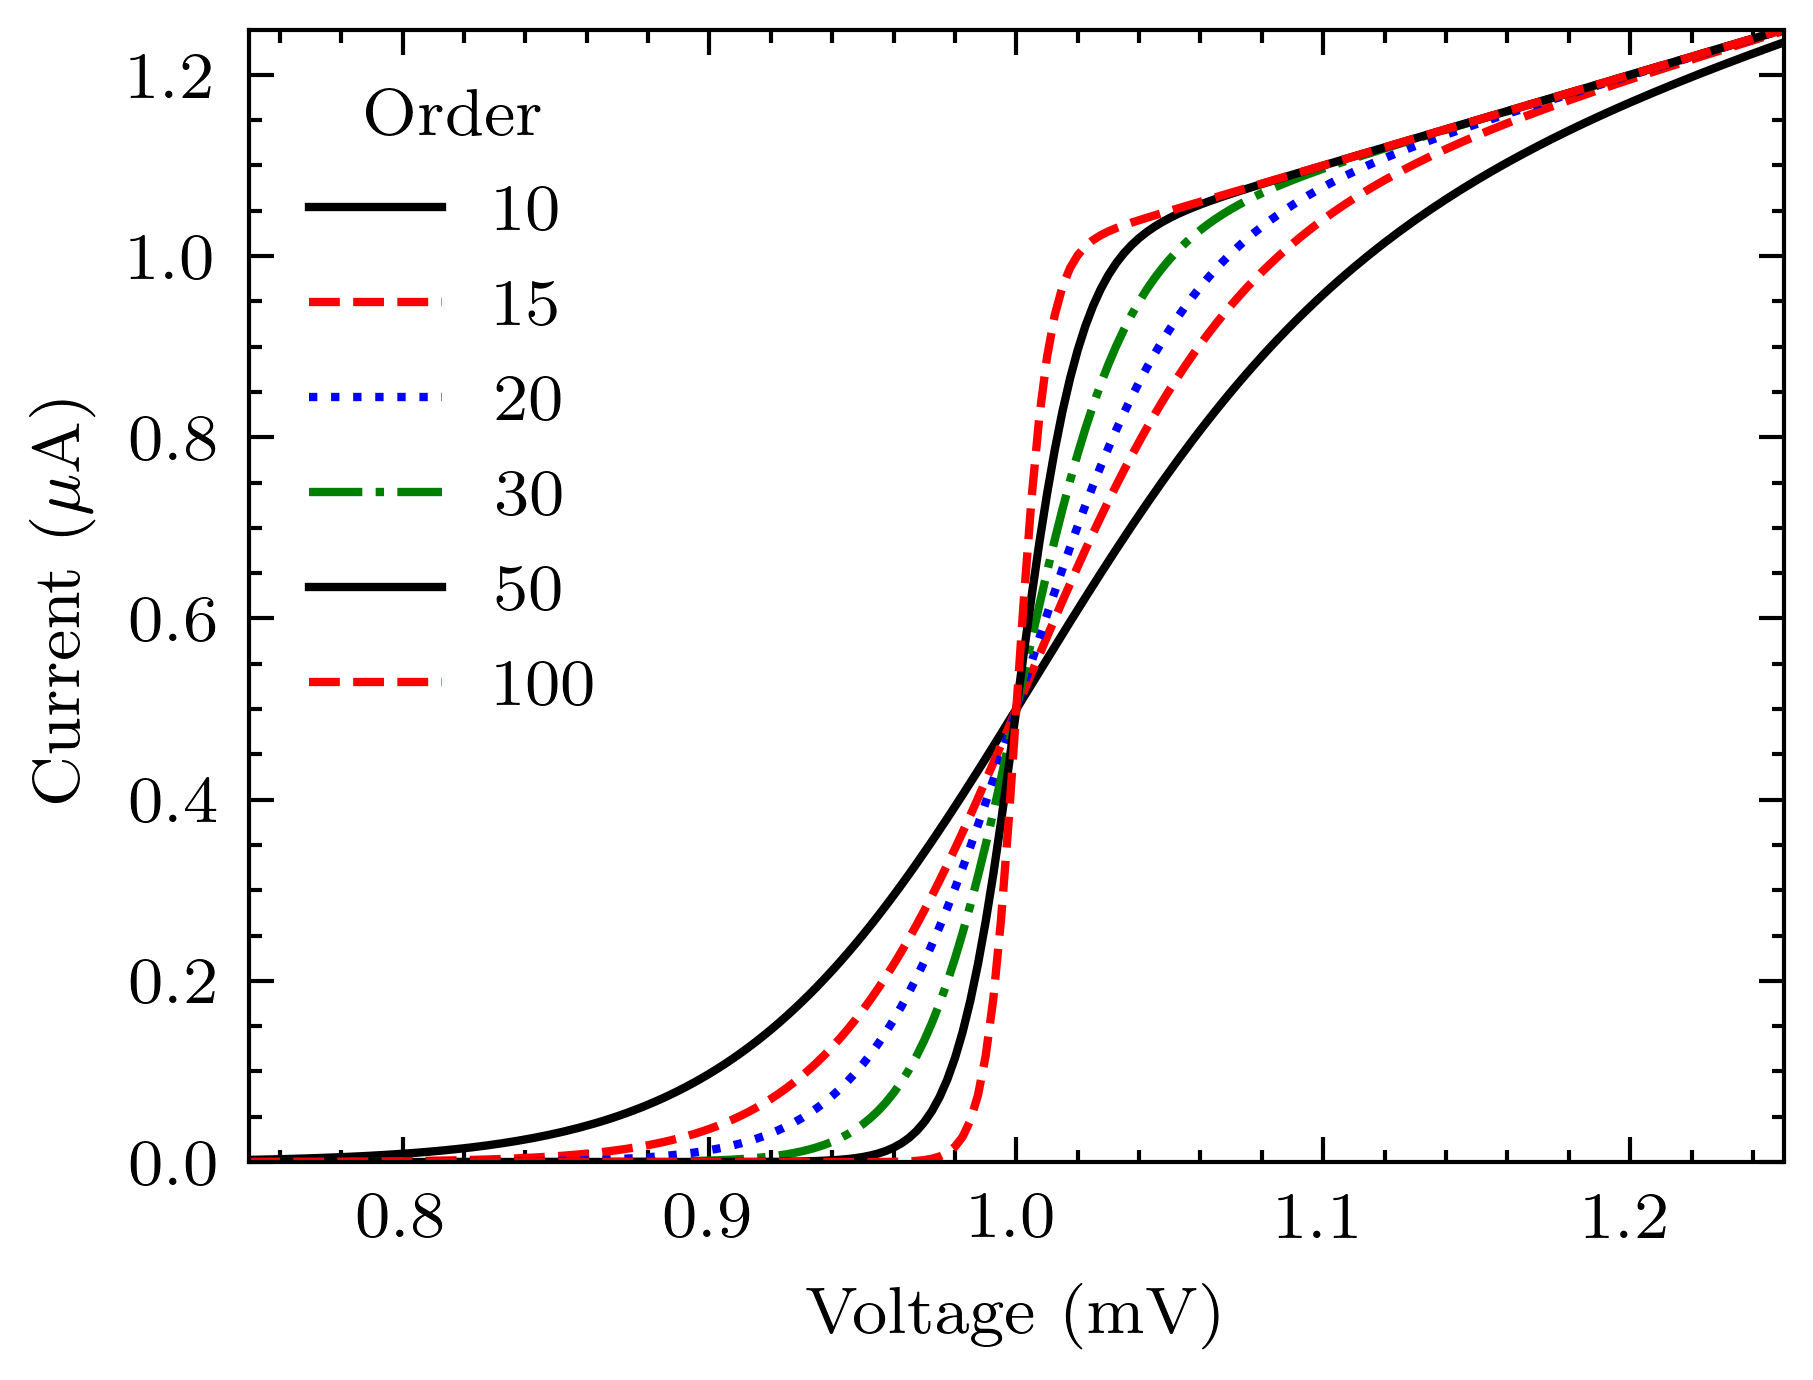

In [13]:
plt.style.use(['science', 'ieee'])

# with plt.style.context(['science']):
plt.figure(figsize=(10, 6), dpi=100)
fig, ax = plt.subplots()        
for p in [10, 15, 20, 30, 50, 100]:               
    ax.plot(x, model(x, p), label=p)        
ax.legend(title='Order')        
ax.set(xlabel='Voltage (mV)')        
ax.set(ylabel='Current ($\mu$A)')        
ax.autoscale(tight=True)     

plt.savefig('./images/SciencePlots_ieee.png', dpi=300, bbox_inches='tight',facecolor='white')
plt.show()

一样的严谨，甚至把黑白印刷难以区分颜色的痛点都考虑到了，非常得Amazing啊！

以上就是科研绘图四大天王的简单介绍，更多详细资料见文末参考资料。

参考资料：<br>
[1] [Datawhale 科研论文配图绘制指南--基于Python》](https://github.com/datawhalechina/paper-chart-tutorial)<br>
[2] [matplotlib 官方文档](https://matplotlib.org/stable/tutorials/index) <br>
[3] [Seaborn 官方文档](https://seaborn.pydata.org/) <br>
[4] [【知乎】简单好用的深度学习论文绘图专用工具包--Science Plot](https://zhuanlan.zhihu.com/p/148233372) <br>
[5] [SciencePlots官方仓库及文档](https://github.com/garrettj403/SciencePlots)